<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_Bernstein%E2%80%93Vazirani__02_OracleU_F_mkbahk_20250723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 16.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=557b197b00d1b245b4aebc44af841412ae0b57b58048c1a1524d93ab9e975607
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.0 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-r41kp_jk
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiski

In [2]:
# 1. 필요한 라이브러리 가져오기
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def create_oracle(secret_string):
    """Bernstein-Vazirani 알고리즘의 오라클 U_F를 생성하는 함수"""
    n = len(secret_string)
    # n개의 입력 큐비트와 1개의 출력 큐비트를 위한 양자 회로
    oracle = QuantumCircuit(n + 1, name="Oracle U_F")

    # 비밀 문자열 s의 각 비트에 따라 CNOT 게이트 추가
    for i, bit in enumerate(reversed(secret_string)):  # reversed: LSB에서 MSB로 처리
        if bit == '1':
            oracle.cx(i, n)  # 입력 큐비트 i와 출력 큐비트 간 CNOT
    return oracle
###def

def bernstein_vazirani(secret_string):
    """Bernstein-Vazirani 알고리즘 구현"""
    n = len(secret_string)

    # 양자 및 고전 레지스터 생성
    qr = QuantumRegister(n + 1, 'q')  # n 입력 큐비트 + 1 출력 큐비트
    cr = ClassicalRegister(n, 'c')   # 측정 결과를 저장할 고전 레지스터
    circuit = QuantumCircuit(qr, cr)

    # 1. 초기 상태 준비: 모든 입력 큐비트에 Hadamard 게이트 적용
    for i in range(n):
        circuit.h(i)
    ##for

    # 출력 큐bit를 |-> 상태로 만들기
    circuit.x(n)  # 출력 큐비트를 |1>로 설정
    circuit.h(n)  # Hadamard 적용하여 |-> 상태로

    # 2. 오라클 적용
    oracle = create_oracle(secret_string)
    circuit.append(oracle, range(n + 1))

    # 3. 입력 큐bit에 다시 Hadamard 게이트 적용
    for i in range(n):
        circuit.h(i)
    ###for

    # 4. 입력 큐bit 측정
    circuit.measure(range(n), range(n))

    return circuit
###def

def run_simulation(circuit):
    """양자 회로를 Aer 시뮬레이터로 실행"""
    simulator = Aer.get_backend("qasm_simulator")
    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(circuit, simulator)
    job = simulator.run(transpiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()
    return counts
###def

In [8]:
# 메인 실행
if __name__ == "__main__":
    secret_string = "010"  # 예시 비밀 문자열
    circuit = bernstein_vazirani(secret_string)

    # 시뮬레이션 실행 및 결과 출력
    counts = run_simulation(circuit)
    print("\n측정 결과:", counts)
###if


측정 결과: {'010': 1024}


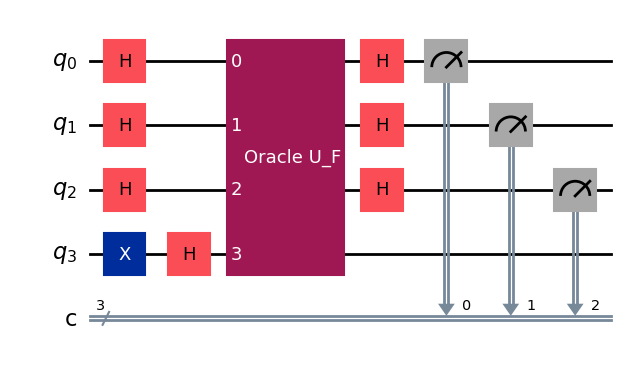

In [9]:
# 회로 시각화
#print("Bernstein-Vazirani 회로:")
#print(circuit)

circuit.draw(output='mpl')

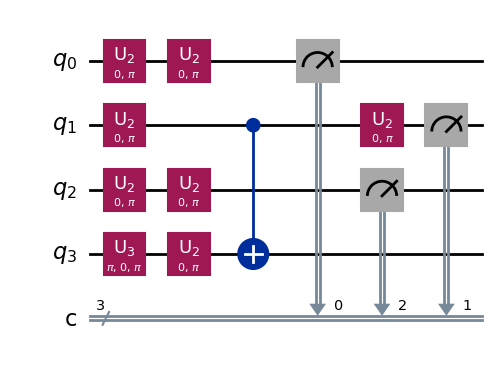

In [10]:
circuit.decompose().draw(output='mpl')

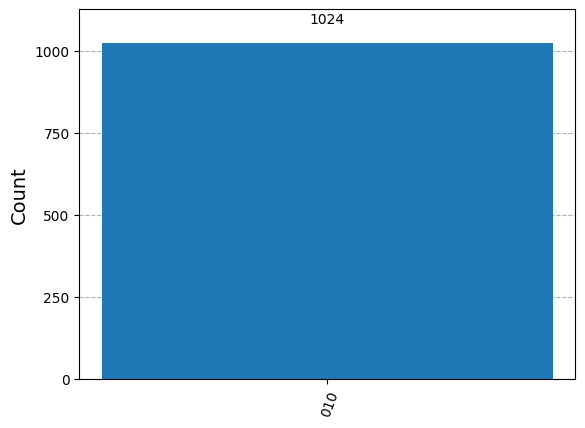

In [11]:
# 결과 히스토그램 시각화
plot_histogram(counts)
#plt.show()